#### CMSE 410 Final Project
### &#9989; Mitchell Gabalski


# ___Cardiac Differentiation of Pluripotent Stem Cells Model___

In [524]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
%matplotlib inline
from scipy.integrate import odeint


In [525]:
print('Cell line = AICS (GFP tag for cardiomyocytes)')
print('Model Type = Monolayer')

Cell line = AICS (GFP tag for cardiomyocytes)
Model Type = Monolayer


In [526]:
My_plan = {'Day 0': '6 uM of CHIR99021 RPMI/B27-insulin:  each well will receive 3 mL of medium, prepare 18 mL of medium per 6 well plate','Day 1' : 'Aspirate the medium from each well and add 3 ml of RPMI/B27-insulin exactly after 24 hrs.','Day 2' : ' Swirl plate gently, Aspirate medium and add 3 ml 3 uM Wnt-C59.', 'Day 5' : 'Aspirate medium and add 3 ml RPMI/B27-insulin', 'Day 7 and every 3rd day': 'Aspirate and add 2 ml RPMI/B27+insulin.  ',}

In [527]:
My_plan

{'Day 0': '6 uM of CHIR99021 RPMI/B27-insulin:  each well will receive 3 mL of medium, prepare 18 mL of medium per 6 well plate',
 'Day 1': 'Aspirate the medium from each well and add 3 ml of RPMI/B27-insulin exactly after 24 hrs.',
 'Day 2': ' Swirl plate gently, Aspirate medium and add 3 ml 3 uM Wnt-C59.',
 'Day 5': 'Aspirate medium and add 3 ml RPMI/B27-insulin',
 'Day 7 and every 3rd day': 'Aspirate and add 2 ml RPMI/B27+insulin.  '}

In order for us to know how many cells react to growth factor, we first need to know how the growth factor is absorbed by the cells over time. The first Growth factor added to the monolayer is CHIR at a concentration of 21.6 ul for exactly 24hours.

In [528]:
#CHIR OVER TIME 
def derivs_1 (curr_vals,t,u,k,Cn): #equation for modeling the amount of signaling molecule over time
    S   = curr_vals
    dSdt = u*(1-S-((k*S*Cn)*t))
    return dSdt

In [529]:
S0 = 6 #concentration of signalling molecules


init = [S0]

t = np.arange(0,1,0.01) #time

u = 2.77 #death rate
k = (1.28*(10**-9)) #possitive constant
Cn = 100000 # Ammount of cells

In [530]:
#assigning a string to answer
sol_1 = odeint(derivs_1,init,t,args = (u,k,Cn))

Stage one of Cardiac differentiation: CHIR exposure


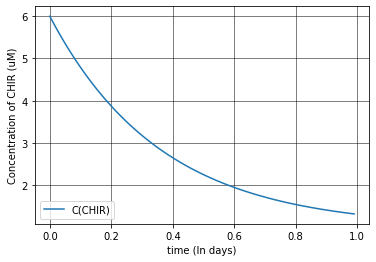

In [531]:
#basic printing fucntions
print('Stage one of Cardiac differentiation: CHIR exposure')
plt.plot(t,sol_1, label = 'C(CHIR)')
plt.title = ("ammount of CHIR present over time")
plt.xlabel('time (In days)')
plt.ylabel('Concentration of CHIR (uM)')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')
plt.legend(loc ='lower left')

Next we have to see how the Cells will react to the growth factor. The bellow graph shows how the amount of iPSC's decrease overtime in responce to the groth factor. Which is exactly what we want to see.

In [532]:
#IMPACT OF UNDIFFERENTIATED CELLS FROM CHIR
def derivs_2 (curr_vals,t,u1,a1,p1,u2,a2,p2): #equation for density of population of stem cells, cells at 1st stage of differentiation
    C1,C2 = curr_vals
    dC1dt = ((((2*(a1*Sk1))*(t))-1))*((p1*Sk1)*(t))*(C1*(t))-(u1*C1)
    dC2dt = ((((2*(a2*Sk1))*(t))-1))*((p2*Sk2)*(t))*(C2*(t)) + (2*(1-a1*Sk2*(t))*(p1*Sk2*(t))*(C1*(t))-(u2*C2))
    return dC1dt,dC2dt

In [533]:
#Important constant how cells are effected by signalling molecules
Sk1 = 1/(k*Cn)+1
Sk2 = 1/(k*Cn)+1

In [534]:
C1_0  = 100000
C2_0  = 0
init  = [C1_0,C2_0]

u1 = 1.3 #death rate (caused by growth factor)
a1 = 0 # death of cells (controlled)
p1 = 0.001 #increase of cells (poliferation)

u2 = 0 #death rate (caused by growth factor)
a2 = 0 # death of cells (controlled)
p2 = 0 #increase of cells (poliferation)

t = np.arange(0,1.1,0.1) #time

In [535]:
sol_2 = odeint(derivs_2,init,t,args = (u1,a1,p1,u2,a2,p2))

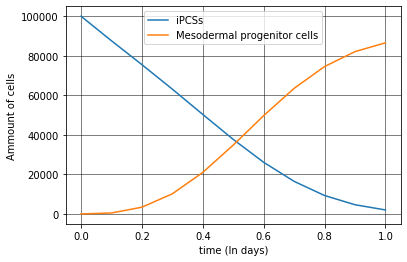

In [536]:
plt.plot(t,sol_2[:, 0],label = 'iPCSs')
plt.plot(t,sol_2[:, 1],label = 'Mesodermal progenitor cells' )

plt.xlabel('time (In days)')
plt.ylabel('Ammount of cells')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')
plt.legend(loc = 'best')

The ammount of iPSC's present as time goes on is represented bellow. Since CHIR is only administered for 1 day we will only be looking at the second output. This output shows how many IPSC's are left after one CHIR administration.

In [537]:
print(sol_2)

[[100000.              0.        ]
 [ 87581.14072491    472.05407249]
 [ 75515.21705137   3398.80657787]
 [ 63108.07208171  10181.76701196]
 [ 50324.00446617  20999.40021696]
 [ 37698.02455885  34820.7473064 ]
 [ 26117.30678851  49719.25556587]
 [ 16474.71326907  63517.33364266]
 [  9315.3741635   74539.40715727]
 [  4648.24474883  82108.86395488]
 [  2015.10273326  86545.97445879]]


In [538]:
def derivs_3 (curr_vals,t,u2,a2,p2):
    C2 = curr_vals
    dC2dt = ((a2))*(t)*((p2*(t))*(C2*(t)))
    return dC2dt

In [729]:
C2_0  = 86545
init  = [C2_0]

a2 = 0.05 # death of cells (controlled)
p2 = 3 #increase of cells (poliferation)
t = np.arange(0,2.1,0.1) #time

In [730]:
sol_k = odeint(derivs_3,init,t,args = (u2,a2,p2))

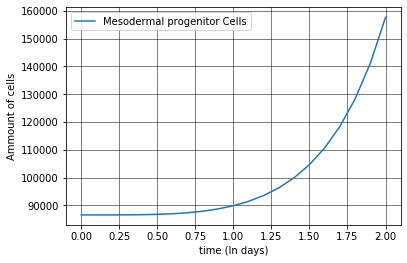

In [731]:
plt.plot(t,sol_k, label = 'Mesodermal progenitor Cells')
plt.title = "ammount of CHIR present over time"
plt.xlabel('time (In days)')
plt.ylabel('Ammount of cells')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')
plt.legend(loc = 'best')

In [725]:
print(sol_k)

[[ 86545.        ]
 [ 86545.33074022]
 [ 86550.19929661]
 [ 86571.2984806 ]
 [ 86628.13004371]
 [ 86748.08622127]
 [ 86966.64256123]
 [ 87327.76013265]
 [ 87884.60708199]
 [ 88700.75880802]
 [ 89852.07588791]
 [ 91429.52690322]
 [ 93543.32815435]
 [ 96328.91095608]
 [ 99955.46565065]
 [104638.18029047]
 [110655.83028673]
 [118376.29838098]
 [128294.0365532 ]
 [141085.85002865]
 [157695.32218083]]


In [543]:
#UNKNOWN CELL GROWTH OVERTIME
def derivs_4 (curr_vals,t,u2,a2,p2):
    C2 = curr_vals
    dC2dt = ((a2))*(t)*((p2*(t))*(C2*(t)))
    return dC2dt

In [734]:
C2_0  = 2721
init  = [C2_0]

a2 = 0.1 # death of cells (controlled)
p2 = 4 #increase of cells (poliferation)
t = np.arange(0,2.1,0.1) #time

In [735]:
sol_j = odeint(derivs_4,init,t,args = (u2,a2,p2))

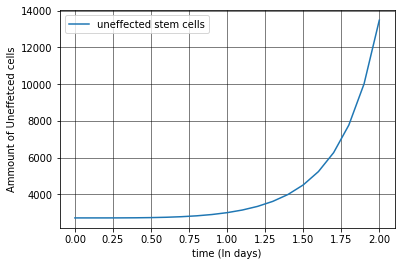

In [736]:
plt.plot(t,sol_j, label = 'uneffected stem cells')

plt.xlabel('time (In days)')
plt.ylabel('Ammount of Uneffetced cells')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')
plt.legend(loc = 'best')

In [737]:
print(sol_j)

[[ 2721.        ]
 [ 2721.02738962]
 [ 2721.4355991 ]
 [ 2723.20512154]
 [ 2727.97495849]
 [ 2738.05986893]
 [ 2756.49408835]
 [ 2787.12233706]
 [ 2834.76680535]
 [ 2905.51216212]
 [ 3007.1707619 ]
 [ 3150.02281032]
 [ 3347.98844573]
 [ 3620.49122555]
 [ 3995.46408829]
 [ 4514.29835131]
 [ 5240.20065245]
 [ 6272.71845751]
 [ 7773.80576928]
 [10016.26113237]
 [13477.20746613]]


Now we will look at how cells react to the second growth factor WNT. This is the exact same ODEINT as the first one which shows how cells absorb the growth factor over time. The second Growth factor added to the monolayer is WNT at a concentration of 3.6 ul for exactly 48hours.

In [548]:
#WNT CONCENTRATION OVERTIME
def derivs_5 (curr_vals,t,u,k,Cn): #equation for modeling the amount of signaling molecule over time
    S   = curr_vals
    dSdt = u*(1-S-((k*S*Cn)*t))
    return dSdt

In [549]:
S0 = 3 #concentration of signalling molecules


init = [S0]

t = np.arange(0,2,0.01) #time

u = 2.77 #death rate
k = (1.28*(10**-9)) #possitive constant
Cn = 166396 # Ammount of cells

In [550]:
sol_3 = odeint(derivs_5,init,t,args = (u,k,Cn))

Stage Two of Cardiac differentiation: WNT exposure


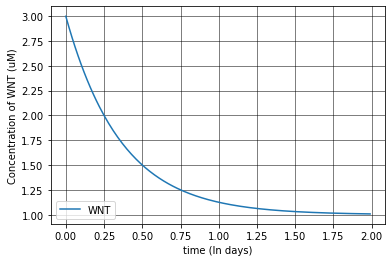

In [551]:
print('Stage Two of Cardiac differentiation: WNT exposure')
plt.plot(t,sol_3, label = 'WNT')
plt.title = "ammount of WNT present over time"
plt.xlabel('time (In days)')
plt.ylabel('Concentration of WNT (uM)')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')
plt.legend(loc ='lower left')

Next we have to see how the Cells will react to the WNT growth factor. The bellow graph shows how the amount of CHIR cells decrease overtime in responce to the groth factor. Which is exactly what we want to see.

In [552]:
#WNT EXPOSURE EFFECT on CHIR CELLS
def derivs_6 (curr_vals,t,u1,a1,p1,u2,a2,p2): #equation for density of population of stem cells, cells at 1st stage of differentiation
    C1,C2 = curr_vals
    dC1dt = ((((2*(a1*Sk1))*(t))-1))*((p1*Sk1)*(t))*(C1*(t))-(u1*C1)
    dC2dt = ((((2*(a2*Sk1))*(t))-1))*((p2*Sk2)*(t))*(C2*(t)) + (2*(1-a1*Sk2*(t))*(p1*Sk2*(t))*(C1*(t))-(u2*C2))
    return dC1dt,dC2dt

In [696]:
C1_0  = 157695
C2_0  = 0
init  = [C1_0,C2_0]

u1 = 1 #death rate (caused by growth factor)
a1 = 0 # death of cells (controlled)
p1 = 0.001 #increase of cells (poliferation)

u2 = 0 #death rate (caused by growth factor)
a2 = 0 # death of cells (controlled)
p2 = 0 #increase of cells (poliferation)

t = np.arange(0,2.1,0.1) #time

In [697]:
sol_4 = odeint(derivs_6,init,t,args = (u1,a1,p1,u2,a2,p2))

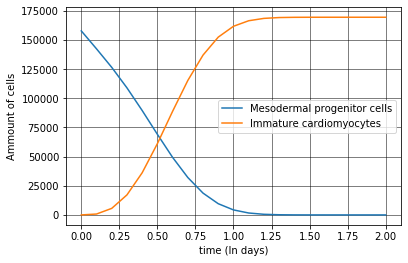

In [698]:
plt.plot(t,sol_4[:, 0],label = 'Mesodermal progenitor cells')
plt.plot(t,sol_4[:, 1],label = 'Immature cardiomyocytes')

plt.title = "ammount of CHIR present over time"
plt.xlabel('time (In days)')
plt.ylabel('Ammount of cells')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')
plt.legend(loc = 'best')

The ammount of CHIR cells present as time goes on is represented bellow. Since WNT is administered for 2 day we will only be looking at the third output. This output shows how many CHIR are left after one WNT administration.

In [699]:
print(sol_4)

[[1.57695000e+05 0.00000000e+00]
 [1.42317188e+05 7.61241981e+02]
 [1.26447448e+05 5.60310534e+03]
 [1.08890336e+05 1.71507557e+04]
 [8.94763902e+04 3.61152444e+04]
 [6.90686063e+04 6.10717379e+04]
 [4.93082209e+04 8.87814979e+04]
 [3.20507093e+04 1.15216265e+05]
 [1.86744972e+04 1.36967645e+05]
 [9.60210444e+03 1.52354481e+05]
 [4.28946833e+03 1.61644951e+05]
 [1.63897872e+03 1.66387474e+05]
 [5.27338208e+02 1.68411800e+05]
 [1.40658026e+02 1.69125706e+05]
 [3.06205113e+01 1.69331101e+05]
 [5.35607044e+00 1.69378679e+05]
 [7.41104293e-01 1.69387433e+05]
 [7.98591841e-02 1.69388695e+05]
 [6.59775502e-03 1.69388835e+05]
 [4.11439351e-04 1.69388847e+05]
 [1.90666856e-05 1.69388848e+05]]


Because not all cells reacted to the CHIR growth factor, and we are administrating a second growth factor WNT. Some of the iPSC's left over from the CHIR exposure will now react with the WNT, to form WNT only cells.

In [557]:
#WNT EXPOSURE ON UNKNOWN CELLS
def derivs_7 (curr_vals,t,u1,a1,p1,u2,a2,p2): #equation for density of population of stem cells, cells at 1st stage of differentiation
    C1,C2 = curr_vals
    dC1dt = ((((2*(a1*Sk1))*(t))-1))*((p1*Sk1)*(t))*(C1*(t))-(u1*C1)
    dC2dt = ((((2*(a2*Sk1))*(t))-1))*((p2*Sk2)*(t))*(C2*(t)) + (2*(1-a1*Sk2*(t))*(p1*Sk2*(t))*(C1*(t))-(u2*C2))
    return dC1dt,dC2dt


In [558]:
C1_0  = 13477
C2_0  = 0
init  = [C1_0,C2_0]

u1 = 1 #death rate (caused by growth factor)
a1 = 0 # death of cells (controlled)
p1 = 1 #increase of cells (poliferation)

u2 = 0 #death rate (caused by growth factor)
a2 = 0 # death of cells (controlled)
p2 = 0 #increase of cells (poliferation)

t = np.arange(0,2,0.1) #time

In [559]:
sol_5 = odeint(derivs_6,init,t,args = (u1,a1,p1,u2,a2,p2))

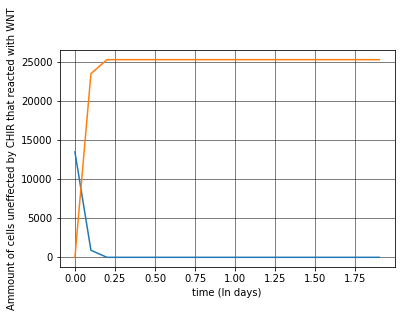

In [560]:
plt.plot(t,sol_5)

plt.xlabel('time (In days)')
plt.ylabel('Ammount of cells uneffected by CHIR that reacted with WNT')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')

The ammount of iPSC's cells that didnt react with CHIR but did react with WNT present as time goes on is represented bellow. Since WNT is administered for 2 day we will only be looking at the third output. This output shows how many iPSC's are left after one WNT administration.

In [561]:
print(sol_5)

[[ 1.34770000e+04  0.00000000e+00]
 [ 9.01662081e+02  2.34828794e+04]
 [ 9.85744649e-06  2.52671786e+04]
 [-5.88077384e-11  2.52671786e+04]
 [-7.04303500e-11  2.52671786e+04]
 [-6.81314064e-11  2.52671786e+04]
 [-5.77444002e-11  2.52671786e+04]
 [-4.73573940e-11  2.52671786e+04]
 [-3.69703878e-11  2.52671786e+04]
 [-2.65833817e-11  2.52671786e+04]
 [-1.61963755e-11  2.52671786e+04]
 [-5.80936928e-12  2.52671786e+04]
 [-7.86907797e-12  2.52671786e+04]
 [-2.56633475e-11  2.52671786e+04]
 [-4.34576171e-11  2.52671786e+04]
 [-6.12518866e-11  2.52671786e+04]
 [-7.90461562e-11  2.52671786e+04]
 [-9.68404258e-11  2.52671786e+04]
 [-1.14634695e-10  2.52671786e+04]
 [-1.32428965e-10  2.52671786e+04]]


In [750]:
def derivs_a (curr_vals,t,u2,a2,p2):
    C2 = curr_vals
    dC2dt = ((a2))*(t)*((p2*(t))*(C2*(t)))
    return dC2dt

In [751]:
C2_0  = 169388
init  = [C2_0]

a2 = 0.5 # death of cells (controlled)
p2 = 0.01 #increase of cells (poliferation)
t = np.arange(0,2.1,0.1) #time

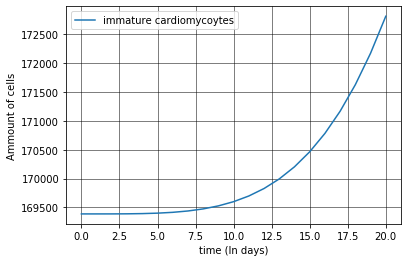

In [752]:
sol_a = odeint(derivs_a,init,t,args = (u2,a2,p2))

plt.plot(sol_a, label = 'immature cardiomycoytes')
plt.xlabel('time (In days)')
plt.ylabel('Ammount of cells')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')
plt.legend(loc = 'best')

In [565]:
sol_a

array([[169388.        ],
       [169599.88191065],
       [172809.8948832 ]])

In [757]:
C2_0  = 25267
init  = [C2_0]

a2 = 0.5 # death of cells (controlled)
p2 = 0.05 #increase of cells (poliferation)
t = np.arange(0,2.1,0.1) #time

sol_b = odeint(derivs_a,init,t,args = (u2,a2,p2))

In [758]:
sol_b

array([[25267.        ],
       [25267.01696614],
       [25267.25449813],
       [25268.28120287],
       [25271.04507244],
       [25276.87388188],
       [25287.47672659],
       [25304.94724125],
       [25331.76907952],
       [25370.82625585],
       [25425.41679951],
       [25499.27362774],
       [25596.59557151],
       [25722.08601794],
       [25881.00717048],
       [26079.25119286],
       [26323.43009871],
       [26620.99122743],
       [26980.3661243 ],
       [27411.15508671],
       [27924.36019239]])

In [766]:
C2_0  = 1613
init  = [C2_0]

a2 = 0.5 # death of cells (controlled)
p2 = 0.05 #increase of cells (poliferation)
t = np.arange(0,2.1,0.1) #time

sol_c = odeint(derivs_a,init,t,args = (u2,a2,p2))

In [767]:
sol_c

array([[1613.        ],
       [1613.00108313],
       [1613.01624678],
       [1613.08178978],
       [1613.25823026],
       [1613.63033101],
       [1614.30719762],
       [1615.42248397],
       [1617.13474207],
       [1619.62808222],
       [1623.11304472],
       [1627.82793228],
       [1634.04079075],
       [1642.05187602],
       [1652.19711758],
       [1664.85266073],
       [1680.4406045 ],
       [1699.43637378],
       [1722.37822314],
       [1749.87901851],
       [1782.64111276]])

In [614]:
def derivs_CHIR (curr_vals,t,u,k,Cn): #equation for modeling the amount of signaling molecule over time
    S   = curr_vals
    dSdt = u*(1-S-((k*S*Cn)*t))
    return dSdt

In [621]:
S0 = 3 #concentration of signalling molecules


init = [S0]

t = np.arange(0,0.04,0.001) #time

u = 2.77 #death rate
k = (1.28*(10**-9)) #possitive constant
Cn = 199080 # Ammount of cells

In [622]:
sol_CHIR = odeint(derivs_1,init,t,args = (u,k,Cn))

Stage Three of Cardiac differentiation: 2nd CHIR exposure


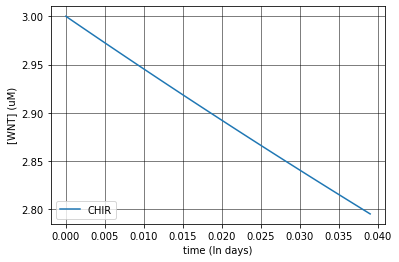

In [625]:
print('Stage Three of Cardiac differentiation: 2nd CHIR exposure')
plt.plot(t,sol_CHIR, label = 'CHIR')
plt.title = "[CHIR] vs. time"
plt.xlabel('time (In days)')
plt.ylabel('[WNT] (uM)')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')
plt.legend(loc ='lower left')

In [570]:
def derivs_CHIR_a (curr_vals,t,u1,a1,p1,u2,a2,p2): #equation for density of population of stem cells, cells at 1st stage of differentiation
    C1,C2 = curr_vals
    dC1dt = ((((2*(a1*Sk1))*(t))-1))*((p1*Sk1)*(t))*(C1*(t))-(u1*C1)
    dC2dt = ((((2*(a2*Sk1))*(t))-1))*((p2*Sk2)*(t))*(C2*(t)) + (2*(1-a1*Sk2*(t))*(p1*Sk2*(t))*(C1*(t))-(u2*C2))
    return dC1dt,dC2dt

In [571]:
C1_0  = 172809
C2_0  = 0
init  = [C1_0,C2_0]

u1 = 1.3 #death rate (caused by growth factor)
a1 = 0 # death of cells (controlled)
p1 = 0.001 #increase of cells (poliferation)

u2 = 0 #death rate (caused by growth factor)
a2 = 0 # death of cells (controlled)
p2 = 0 #increase of cells (poliferation)

t = np.arange(0,0.04,0.001) #time

In [572]:
sol_CHIR_a = odeint(derivs_CHIR_a,init,t,args = (u1,a1,p1,u2,a2,p2))

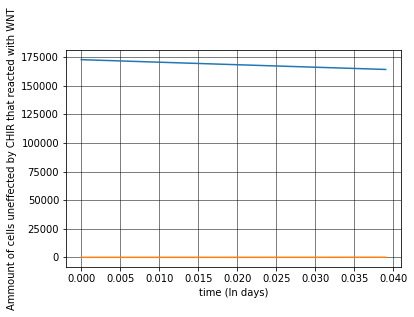

In [573]:
plt.plot(t,sol_CHIR_a)

plt.xlabel('time (In days)')
plt.ylabel('Ammount of cells uneffected by CHIR that reacted with WNT')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')

In [574]:
print(sol_CHIR_a)

[[1.72809000e+05 0.00000000e+00]
 [1.72584494e+05 8.99293236e-04]
 [1.72360277e+05 7.18727700e-03]
 [1.72136345e+05 2.42334042e-02]
 [1.71912697e+05 5.73861624e-02]
 [1.71689328e+05 1.11973136e-01]
 [1.71466237e+05 1.93301056e-01]
 [1.71243419e+05 3.06655855e-01]
 [1.71020872e+05 4.57302709e-01]
 [1.70798592e+05 6.50486091e-01]
 [1.70576578e+05 8.91429819e-01]
 [1.70354826e+05 1.18533710e+00]
 [1.70133332e+05 1.53739058e+00]
 [1.69912095e+05 1.95275239e+00]
 [1.69691111e+05 2.43656418e+00]
 [1.69470378e+05 2.99394716e+00]
 [1.69249891e+05 3.63000218e+00]
 [1.69029650e+05 4.34980971e+00]
 [1.68809650e+05 5.15842995e+00]
 [1.68589889e+05 6.06090280e+00]
 [1.68370364e+05 7.06224794e+00]
 [1.68151073e+05 8.16746488e+00]
 [1.67932012e+05 9.38153296e+00]
 [1.67713178e+05 1.07094114e+01]
 [1.67494570e+05 1.21560394e+01]
 [1.67276184e+05 1.37263359e+01]
 [1.67058017e+05 1.54252002e+01]
 [1.66840068e+05 1.72575113e+01]
 [1.66622332e+05 1.92281284e+01]
 [1.66404807e+05 2.13418907e+01]
 [1.661874

In [575]:
def derivs_CHIR_b (curr_vals,t,u1,a1,p1,u2,a2,p2): #equation for density of population of stem cells, cells at 1st stage of differentiation
    C1,C2 = curr_vals
    dC1dt = ((((2*(a1*Sk1))*(t))-1))*((p1*Sk1)*(t))*(C1*(t))-(u1*C1)
    dC2dt = ((((2*(a2*Sk1))*(t))-1))*((p2*Sk2)*(t))*(C2*(t)) + (2*(1-a1*Sk2*(t))*(p1*Sk2*(t))*(C1*(t))-(u2*C2))
    return dC1dt,dC2dt

In [576]:
C1_0  = 27924
C2_0  = 0
init  = [C1_0,C2_0]

u1 = 1.3 #death rate (caused by growth factor)
a1 = 0 # death of cells (controlled)
p1 = 0.001 #increase of cells (poliferation)

u2 = 0 #death rate (caused by growth factor)
a2 = 0 # death of cells (controlled)
p2 = 0 #increase of cells (poliferation)

t = np.arange(0,0.04,0.001) #time

In [577]:
sol_CHIR_b = odeint(derivs_CHIR_a,init,t,args = (u1,a1,p1,u2,a2,p2))

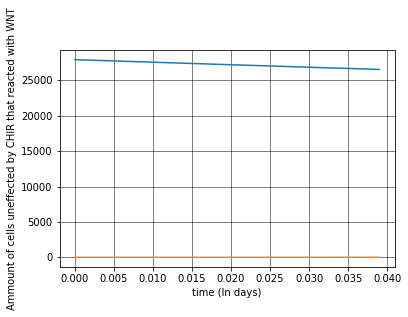

In [578]:
plt.plot(t,sol_CHIR_b)

plt.xlabel('time (In days)')
plt.ylabel('Ammount of cells uneffected by CHIR that reacted with WNT')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')

In [579]:
print(sol_CHIR_b)

[[2.79240000e+04 0.00000000e+00]
 [2.78877223e+04 1.45336460e-04]
 [2.78514913e+04 1.16140425e-03]
 [2.78153066e+04 3.91586759e-03]
 [2.77791675e+04 9.27298231e-03]
 [2.77430736e+04 1.80936264e-02]
 [2.77070245e+04 3.12353082e-02]
 [2.76710196e+04 4.95521744e-02]
 [2.76350585e+04 7.38950184e-02]
 [2.75991406e+04 1.05111289e-01]
 [2.75632656e+04 1.44045096e-01]
 [2.75274329e+04 1.91537223e-01]
 [2.74916421e+04 2.48425124e-01]
 [2.74558926e+04 3.15542943e-01]
 [2.74201841e+04 3.93721512e-01]
 [2.73845160e+04 4.83788363e-01]
 [2.73488879e+04 5.86567734e-01]
 [2.73132993e+04 7.02880575e-01]
 [2.72777498e+04 8.33544554e-01]
 [2.72422389e+04 9.79374066e-01]
 [2.72067662e+04 1.14118024e+00]
 [2.71713311e+04 1.31977092e+00]
 [2.71359333e+04 1.51595073e+00]
 [2.71005723e+04 1.73052103e+00]
 [2.70652476e+04 1.96427991e+00]
 [2.70299589e+04 2.21802226e+00]
 [2.69947056e+04 2.49253971e+00]
 [2.69594873e+04 2.78862068e+00]
 [2.69243037e+04 3.10705034e+00]
 [2.68891541e+04 3.44861067e+00]
 [2.685403

In [580]:
def derivs_CHIR_c (curr_vals,t,u1,a1,p1,u2,a2,p2): #equation for density of population of stem cells, cells at 1st stage of differentiation
    C1,C2 = curr_vals
    dC1dt = ((((2*(a1*Sk1))*(t))-1))*((p1*Sk1)*(t))*(C1*(t))-(u1*C1)
    dC2dt = ((((2*(a2*Sk1))*(t))-1))*((p2*Sk2)*(t))*(C2*(t)) + (2*(1-a1*Sk2*(t))*(p1*Sk2*(t))*(C1*(t))-(u2*C2))
    return dC1dt,dC2dt

In [581]:
C1_0  = 1768
C2_0  = 0
init  = [C1_0,C2_0]

u1 = 1.3 #death rate (caused by growth factor)
a1 = 0 # death of cells (controlled)
p1 = 4 #increase of cells (poliferation)

u2 = 0 #death rate (caused by growth factor)
a2 = 1 # death of cells (controlled)
p2 = 0 #increase of cells (poliferation)

t = np.arange(0,0.04,0.001) #time

In [582]:
sol_CHIR_c = odeint(derivs_CHIR_a,init,t,args = (u1,a1,p1,u2,a2,p2))

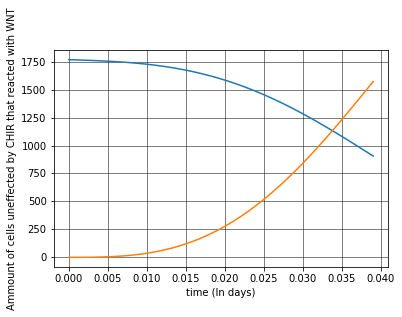

In [583]:
plt.plot(t,sol_CHIR_c)

plt.xlabel('time (In days)')
plt.ylabel('Ammount of cells uneffected by CHIR that reacted with WNT')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')

In [584]:
print(sol_CHIR_c)

[[1.76800000e+03 0.00000000e+00]
 [1.76568470e+03 3.68019663e-02]
 [1.76326221e+03 2.94118027e-01]
 [1.76062292e+03 9.91583064e-01]
 [1.75765795e+03 2.34767701e+00]
 [1.75425930e+03 4.57938567e+00]
 [1.75032008e+03 7.90172798e+00]
 [1.74573486e+03 1.25271529e+01]
 [1.74039996e+03 1.86648065e+01]
 [1.73421393e+03 2.65196786e+01]
 [1.72707800e+03 3.62916315e+01]
 [1.71889666e+03 4.81743185e+01]
 [1.70957818e+03 6.23540034e+01]
 [1.69903530e+03 7.90082903e+01]
 [1.68718586e+03 9.83047777e+01]
 [1.67395353e+03 1.20399651e+02]
 [1.65926849e+03 1.45436229e+02]
 [1.64306817e+03 1.73543493e+02]
 [1.62529801e+03 2.04834599e+02]
 [1.60591213e+03 2.39405421e+02]
 [1.58487409e+03 2.77333129e+02]
 [1.56215748e+03 3.18674836e+02]
 [1.53774660e+03 3.63466347e+02]
 [1.51163698e+03 4.11721021e+02]
 [1.48383586e+03 4.63428787e+02]
 [1.45436258e+03 5.18555332e+02]
 [1.42324887e+03 5.77041499e+02]
 [1.39053904e+03 6.38802899e+02]
 [1.35629000e+03 7.03729781e+02]
 [1.32057119e+03 7.71687165e+02]
 [1.283464

In [791]:
C2_0  = 164240
init  = [C2_0]

a2 = 0.5 # death of cells (controlled)
p2 = 0.0002 #increase of cells (poliferation)
t = np.arange(0,8.1,1) #time

sol_b_1 = odeint(derivs_a,init,t,args = (u2,a2,p2))
print(sol_b_1)

[[164240.        ]
 [164244.11892749]
 [164305.72222385]
 [164572.93952687]
 [165294.52962926]
 [166826.43172638]
 [169648.555496  ]
 [174400.43299952]
 [181949.46968199]]


In [792]:
C2_0  = 26539
init  = [C2_0]

a2 = 0.5 # death of cells (controlled)
p2 = 0.0002 #increase of cells (poliferation)
t = np.arange(0,8.1,1) #time

sol_b_2 = odeint(derivs_a,init,t,args = (u2,a2,p2))
print(sol_b_2)

[[26539.        ]
 [26539.66556397]
 [26549.61983749]
 [26592.79860032]
 [26709.39796548]
 [26956.93297372]
 [27412.95064741]
 [28180.79086341]
 [29400.61480714]]


In [793]:
C2_0  = 15719
init  = [C2_0]

a2 = 0.5 # death of cells (controlled)
p2 = 0.0002 #increase of cells (poliferation)
t = np.arange(0,8.1,1) #time

sol_b_3 = odeint(derivs_a,init,t,args = (u2,a2,p2))
print(sol_b_3)

[[15719.        ]
 [15719.39421232]
 [15725.29010989]
 [15750.86481026]
 [15819.9263959 ]
 [15966.54091772]
 [16236.63933187]
 [16691.42965388]
 [17413.92909138]]


In [794]:

C2_0  = 9058
init  = [C2_0]

a2 = 0.5 # death of cells (controlled)
p2 = 0.0002 #increase of cells (poliferation)
t = np.arange(0,8.1,1) #time

sol_b_4 = odeint(derivs_a,init,t,args = (u2,a2,p2))
print(sol_b_4)

[[ 9058.        ]
 [ 9058.22716303]
 [ 9061.62464635]
 [ 9076.36194745]
 [ 9116.15836217]
 [ 9200.64429248]
 [ 9356.28723641]
 [ 9618.35802573]
 [10034.69493679]]


In [589]:
unknown = 1340
total = 238225

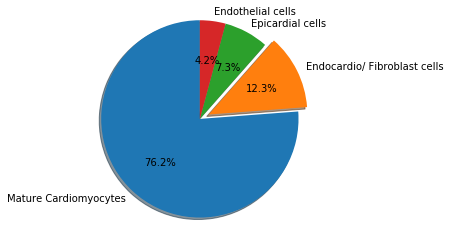

In [590]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Mature Cardiomyocytes', 'Endocardio/ Fibroblast cells', 'Epicardial cells', 'Endothelial cells'
sizes = [76.2, 12.3, 7.3, 4.2]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

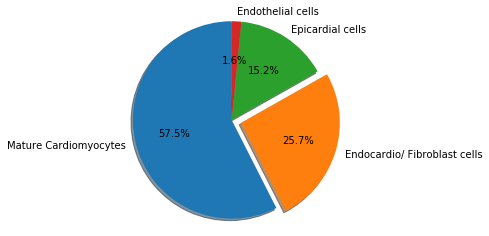

In [591]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Mature Cardiomyocytes', 'Endocardio/ Fibroblast cells', 'Epicardial cells', 'Endothelial cells'
sizes = [58.8, 26.3, 15.6, 1.6]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [592]:
Cells_after_CHIR  =  float(sol_2[-1][1])
Cells_after_CHIR_1  =  float(sol_2[-1][0])
CM_stage_1  =  float(sol_k[-1])
Cells_stage_1  =  float(sol_j[-1])
CM_stage_2  =  float(sol_4[-1][1])
Cells_stage_2  =  float(sol_5[-1][1])
CM_Final = float(sol_a[-1])
Cells_a_final = float(sol_b[-1])

In [593]:
Cells_after_CHIR

86545.97445878695

In [594]:
print(Cells_after_CHIR/400)
print(Cells_after_CHIR_1/400)
print(CM_stage_1/400)
print(Cells_stage_1/400)
print(CM_stage_2/400)
print(Cells_stage_2/400)
print(CM_Final/400)
print(Cells_a_final/400)

216.36493614696738
5.037756833151493
394.23830783149367
33.693018790390845
423.4721183231146
63.167946590842064
432.0247372080027
25.026601344953416


# Results 

Figure (1 a-c)

Figure 1a:
    
    [CHIR](uM)/time(days)

Stage one of Cardiac differentiation: CHIR exposure


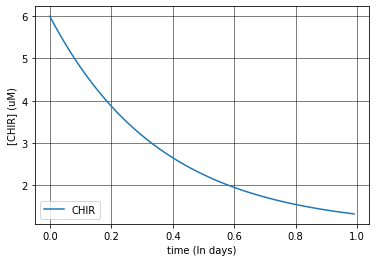

In [629]:
print('Stage one of Cardiac differentiation: CHIR exposure')
t = np.arange(0,1,0.01)
plt.plot(t,sol_1, label = 'CHIR')
plt.title = ("[CHIR] present over time")
plt.xlabel('time (In days)')
plt.ylabel('[CHIR] (uM)')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')
plt.legend(loc ='lower left')

Figure 1b:
    
    [WNT](uM)/time (days)

Stage Two of Cardiac differentiation: WNT exposure


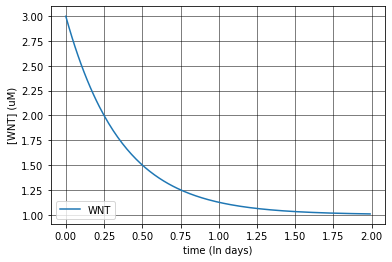

In [627]:
print('Stage Two of Cardiac differentiation: WNT exposure')
t = np.arange(0,2,0.01)
plt.plot(t,sol_3, label = 'WNT')
plt.title = "[WNT] vs. time"
plt.xlabel('time (In days)')
plt.ylabel('[WNT] (uM)')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')
plt.legend(loc ='lower left')

Figure 1C:
    
    [CHIR](uM)/time(days)

Stage Three of Cardiac differentiation: 2nd CHIR exposure


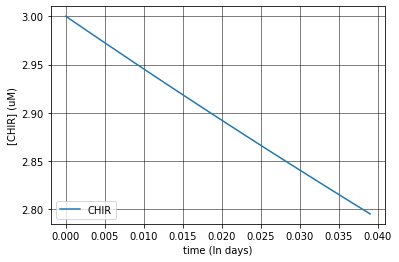

In [810]:
print('Stage Three of Cardiac differentiation: 2nd CHIR exposure')
t = np.arange(0,0.04,0.001)
plt.plot(t,sol_CHIR, label = 'CHIR')
plt.title = "[CHIR] vs. time"
plt.xlabel('time (In days)')
plt.ylabel('[CHIR] (uM)')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')
plt.legend(loc ='lower left')

Figure 2(a-c): 1st CHIR exposure

Figure 2a:
    Ammount of cells vs time

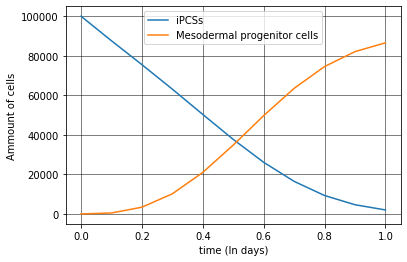

In [703]:
t = np.arange(0,1.1,0.1)
plt.plot(t,sol_2[:, 0],label = 'iPCSs')
plt.plot(t,sol_2[:, 1],label = 'Mesodermal progenitor cells' )


plt.xlabel('time (In days)')
plt.ylabel('Ammount of cells')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')
plt.legend(loc = 'best')

Figure 2b: Mesodermal progenitor cells vs time

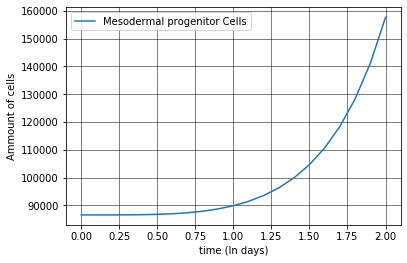

In [732]:
t = np.arange(0,2.1,0.1) #time
plt.plot(t,sol_k, label = 'Mesodermal progenitor Cells')
plt.title = "ammount of CHIR present over time"
plt.xlabel('time (In days)')
plt.ylabel('Ammount of cells')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')
plt.legend(loc = 'best')

Figure 2c: Stem cells vs time

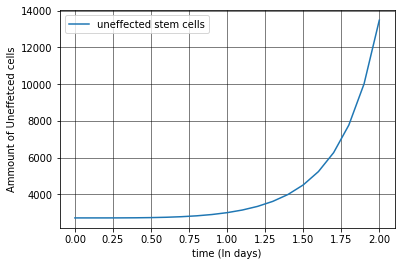

In [738]:
plt.plot(t,sol_j, label = 'uneffected stem cells')

plt.xlabel('time (In days)')
plt.ylabel('Ammount of Uneffetced cells')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')
plt.legend(loc = 'best')

Figure 3: WNT exposure

Figure 3a: Mesodermal progenitors vs time

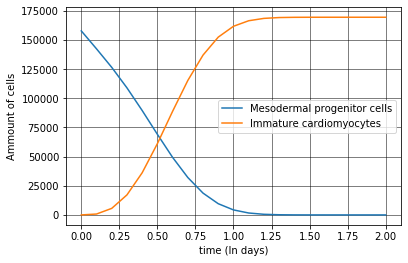

In [739]:
plt.plot(t,sol_4[:, 0],label = 'Mesodermal progenitor cells')
plt.plot(t,sol_4[:, 1],label = 'Immature cardiomyocytes')

plt.title = "ammount of CHIR present over time"
plt.xlabel('time (In days)')
plt.ylabel('Ammount of cells')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')
plt.legend(loc = 'best')

Figure 3b: Stem cells vs time

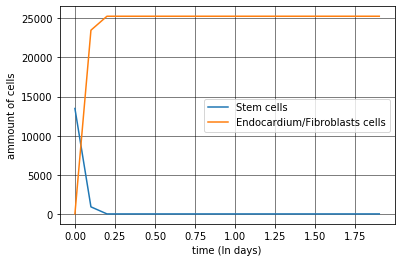

In [748]:
t = np.arange(0,2,0.1)
plt.plot(t,sol_5[:, 0],label = 'Stem cells')
plt.plot(t,sol_5[:, 1],label = 'Endocardium/Fibroblasts cells')

plt.xlabel('time (In days)')
plt.ylabel('ammount of cells')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')
plt.legend(loc = 'best')

Figure 3c: Immature cardiomyocytes vs time

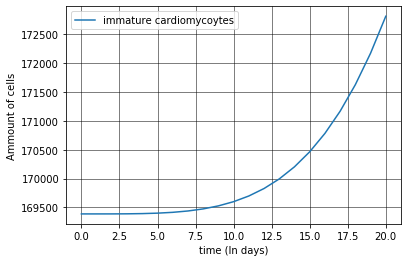

In [754]:
sol_a = odeint(derivs_a,init,t,args = (u2,a2,p2))

plt.plot(sol_a, label = 'immature cardiomycoytes')
plt.xlabel('time (In days)')
plt.ylabel('Ammount of cells')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')plt.legend(loc = 'best')

Figure 3d: Endocardium/Fibroblasts cells vs time

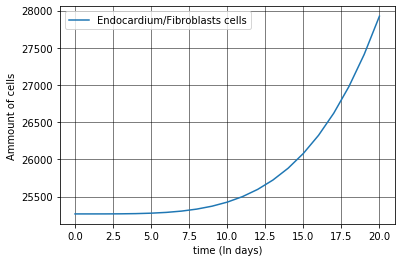

In [761]:

plt.plot(sol_b, label = 'Endocardium/Fibroblasts cells')
plt.xlabel('time (In days)')
plt.ylabel('Ammount of cells')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')
plt.legend(loc = 'best')

Figure 3e: uneffected cells vs time

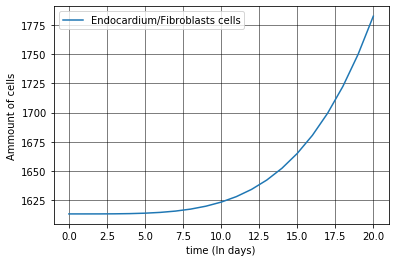

In [768]:
plt.plot(sol_c, label = 'Endocardium/Fibroblasts cells')
plt.xlabel('time (In days)')
plt.ylabel('Ammount of cells')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')
plt.legend(loc = 'best')

Figure 4: 2nd CHIR exposure

Figure 4a: Cardiomyocytes vs time

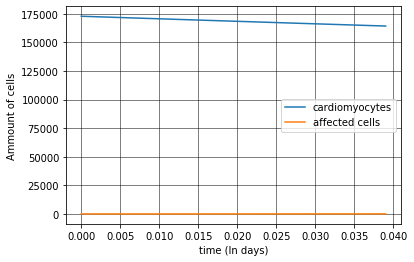

In [811]:
t = np.arange(0,0.04,0.001)
plt.plot(t,sol_CHIR_a[:, 0],label = 'cardiomyocytes')
plt.plot(t,sol_CHIR_a[:, 1],label = 'affected cells')

plt.xlabel('time (In days)')
plt.ylabel('Ammount of cells')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')
plt.legend(loc = 'best')

Figure 4b: Endocardium/Fibroblasts cells vs time

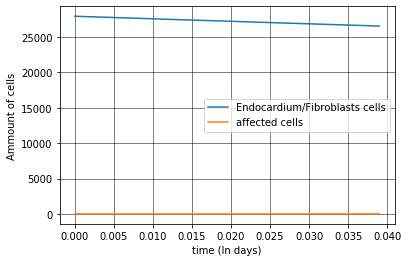

In [812]:
plt.plot(t,sol_CHIR_b[:, 0],label = 'Endocardium/Fibroblasts cells')
plt.plot(t,sol_CHIR_b[:, 1],label = 'affected cells')

plt.xlabel('time (In days)')
plt.ylabel('Ammount of cells')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')
plt.legend(loc = 'best')

Figure 4c: stemcells vs time

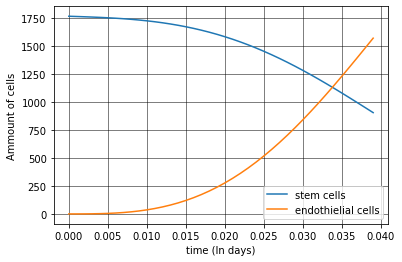

In [813]:
plt.plot(t,sol_CHIR_c[:, 0],label = 'stem cells')
plt.plot(t,sol_CHIR_c[:, 1],label = 'endothielial cells')

plt.xlabel('time (In days)')
plt.ylabel('Ammount of cells')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')
plt.legend(loc = 'best')

Figure 5: cell types vs time 

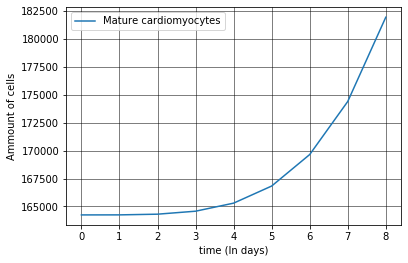

In [814]:
plt.plot(sol_b_1, label = 'Mature cardiomyocytes')
plt.xlabel('time (In days)')
plt.ylabel('Ammount of cells')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')
plt.legend(loc = 'best')

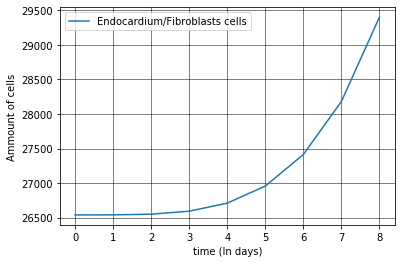

In [796]:
plt.plot(sol_b_2, label = 'Endocardium/Fibroblasts cells')
plt.xlabel('time (In days)')
plt.ylabel('Ammount of cells')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')
plt.legend(loc = 'best')

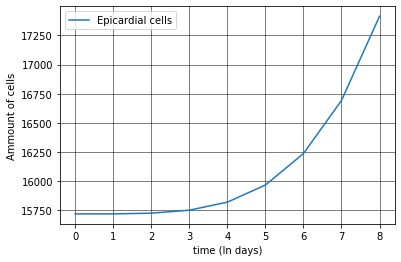

In [797]:
plt.plot(sol_b_3, label = 'Epicardial cells')
plt.xlabel('time (In days)')
plt.ylabel('Ammount of cells')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')
plt.legend(loc = 'best')

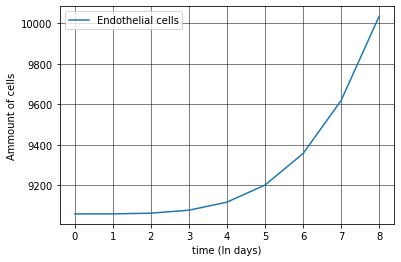

In [798]:
plt.plot(sol_b_4, label = 'Endothelial cells')
plt.xlabel('time (In days)')
plt.ylabel('Ammount of cells')
plt.grid(color = 'black',linestyle='-', linewidth = '0.5')
plt.legend(loc = 'best')

Figure 6: Fianl plots

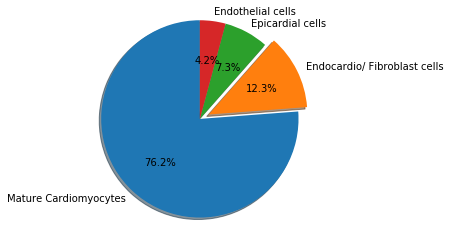

In [799]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Mature Cardiomyocytes', 'Endocardio/ Fibroblast cells', 'Epicardial cells', 'Endothelial cells'
sizes = [76.2, 12.3, 7.3, 4.2]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

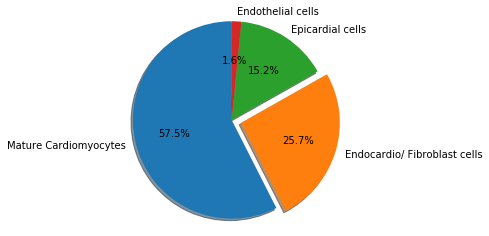

In [800]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Mature Cardiomyocytes', 'Endocardio/ Fibroblast cells', 'Epicardial cells', 'Endothelial cells'
sizes = [58.8, 26.3, 15.6, 1.6]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

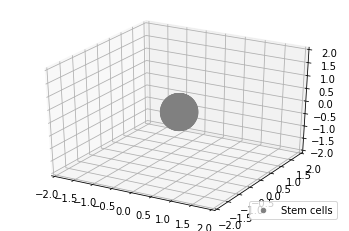

In [824]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.set_aspect("equal")

# draw sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:1*np.pi:25j]
x = (np.cos(u)/1.65)*(np.sin(v)/1.65)
y = (np.sin(u)/1.65)*(np.sin(v)/1.65)
z = np.cos(v)/1.65

ax.scatter(x, y, z, color = 'grey', label = 'Stem cells')
ax.legend(loc = 'lower right')
plt.xlim([-2,2])
plt.ylim([-2,2])
ax.axes.set_zlim3d(bottom=-2, top=2)
plt.show()

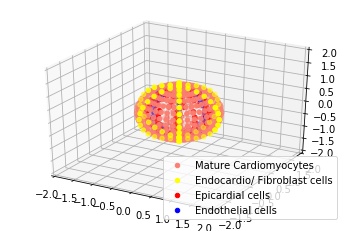

In [822]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.set_aspect("equal")

# draw sphere
u, v = np.mgrid[0:2*np.pi:38j, 0:1*np.pi:15j]
x = (np.cos(u)/1.03)*(np.sin(v)/1.03)
y = (np.sin(u)/1.03)*(np.sin(v)/1.03)
z = np.cos(v)/1.03

u2, v2 = np.mgrid[0:2*np.pi:12j, 0:9*np.pi:15j]
x2 = (np.cos(u2)/1.1)*(np.sin(v2)/1.2)
y2 = (np.sin(u2)/1.1)*(np.sin(v2)/1.2)
z2 = np.cos(v2)/1.2

u1, v1 = np.mgrid[0:2*np.pi:7j, 0:9*np.pi:15j]
x1 = np.cos(u1)*np.sin(v1)/0.99
y1 = np.sin(u1)*np.sin(v1)/0.99
z1 = np.cos(v1)/0.99

u3, v3 = np.mgrid[0:4*np.pi:4j, 0:4*np.pi:15j]
x3 = np.cos(u1)*np.sin(v1)/1.5
y3 = np.sin(u1)*np.sin(v1)/1.5
z3 = np.cos(v1)

ax.scatter(x, y, z, color = 'salmon', label = 'Mature Cardiomyocytes')
ax.scatter(x1, y1, z1, color = 'Yellow', label = 'Endocardio/ Fibroblast cells' )
ax.scatter(x2, y2, z2, color = 'red', label = 'Epicardial cells')
ax.scatter(x3, y3, z3, color = 'blue', label = 'Endothelial cells')
ax.legend(loc = 'lower right')
plt.xlim([-2,2])
plt.ylim([-2,2])
ax.axes.set_zlim3d(bottom=-2, top=2)
plt.show()

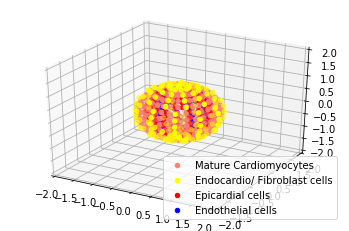

In [823]:
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.set_aspect("equal")

# draw sphere
u, v = np.mgrid[0:2*np.pi:30j, 0:1*np.pi:15j]
x = (np.cos(u)/1.03)*(np.sin(v)/1.03)
y = (np.sin(u)/1.03)*(np.sin(v)/1.03)
z = np.cos(v)/1.03

u2, v2 = np.mgrid[0:2*np.pi:18j, 0:9*np.pi:15j]
x2 = (np.cos(u2)/1.1)*(np.sin(v2)/1.2)
y2 = (np.sin(u2)/1.1)*(np.sin(v2)/1.2)
z2 = np.cos(v2)/1.2

u1, v1 = np.mgrid[0:2*np.pi:12j, 0:9*np.pi:15j]
x1 = np.cos(u1)*np.sin(v1)/0.99
y1 = np.sin(u1)*np.sin(v1)/0.99
z1 = np.cos(v1)/0.99

u3, v3 = np.mgrid[0:4*np.pi:2j, 0:4*np.pi:15j]
x3 = np.cos(u1)*np.sin(v1)/1.5
y3 = np.sin(u1)*np.sin(v1)/1.5
z3 = np.cos(v1)

ax.scatter(x, y, z, color = 'salmon', label = 'Mature Cardiomyocytes')
ax.scatter(x1, y1, z1, color = 'Yellow', label = 'Endocardio/ Fibroblast cells' )
ax.scatter(x2, y2, z2, color = 'red', label = 'Epicardial cells')
ax.scatter(x3, y3, z3, color = 'blue', label = 'Endothelial cells')
ax.legend(loc = 'lower right')
plt.xlim([-2,2])
plt.ylim([-2,2])
ax.axes.set_zlim3d(bottom=-2, top=2)
plt.show()

### References

Paździorek, Przemysław Rafał. “Mathematical Model of Stem Cell Differentiation and Tissue Regeneration with Stochastic Noise.” Bulletin of Mathematical Biology, vol. 76, no. 7, 2014, pp. 1642–1669., doi:10.1007/s11538-014-9971-5.

Crauste, Fabien, and Mostafa Adimy. “Modeling and Asymptotic Stability of a Growth Factor-Dependent Stem Cell Dynamics Model with Distributed Delay.” Discrete and Continuous Dynamical Systems - Series B, vol. 8, no. 1, Jan. 2007, pp. 19–38., doi:10.3934/dcdsb.2007.8.19.

Daidalos. “How to Plot a Circle in Python Using Matplotlib ?” How to Plot a Circle in Python Using Matplotlib ?, 18 June 2019, www.science-emergence.com/Articles/How-to-plot-a-circle-in-python-using-matplotlib-/.